<a href="https://colab.research.google.com/github/fionisarnen/churn-prediction-svc-gridsearch/blob/main/komfin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Requirement

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.max_rows = None
pd.options.display.max_columns = None
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Preprocessing data

In [ ]:
churn = pd.read_csv(r"Churn_Modelling.csv", delimiter=',')
display(churn.head())

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
display(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


None

In [ ]:
print ("Rows     : " ,churn.shape[0])
print ("Columns  : " ,churn.shape[1])
print ("Unique values :\n",churn.nunique())

Rows     :  10000
Columns  :  14
Unique values :
 RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64


In [ ]:
churn = churn.drop(["RowNumber", "CustomerId", "Surname"], axis = 1)
display(churn.head())

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


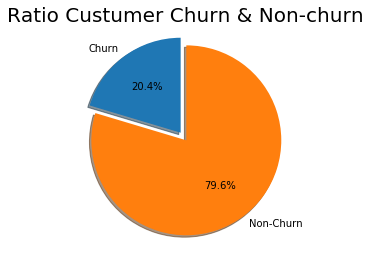

In [ ]:
labels = 'Churn', 'Non-Churn'
sizes = [churn.Exited[churn['Exited']==1].count(), churn.Exited[churn['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(6, 4))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Ratio Custumer Churn & Non-churn", size = 20)
plt.show()

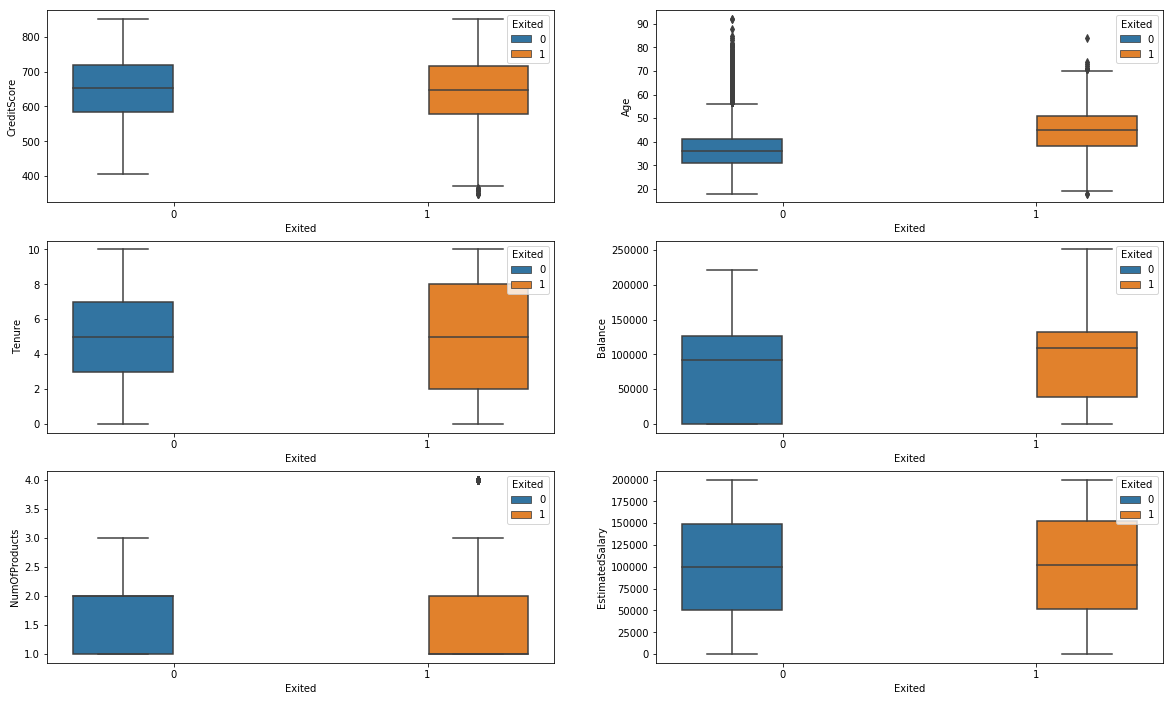

In [ ]:
fig, axarr = plt.subplots(3,2, figsize=(20,12))
sns.boxplot(y='CreditScore', x='Exited', hue='Exited', data=churn, ax=axarr[0][0])
sns.boxplot(y='Age',x='Exited', hue='Exited', data=churn, ax=axarr[0][1])
sns.boxplot(y='Tenure',x='Exited', hue='Exited', data=churn, ax=axarr[1][0])
sns.boxplot(y='Balance',x='Exited', hue='Exited', data=churn, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x='Exited', hue='Exited', data=churn, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x='Exited', hue='Exited', data=churn, ax=axarr[2][1])

churn.shape

In [ ]:
churn_train = churn.sample(frac=0.8,random_state=200)
churn_test = churn.drop(churn_train.index)
print(len(churn_train))
print(len(churn_test))
#churn

8000
2000


## Feature Manipulation

In [ ]:
churn_train['BalanceSalaryRatio'] = churn_train.Balance/churn_train.EstimatedSalary
churn_train['TenureByAge'] = churn_train.Tenure/(churn_train.Age)
churn_train['CreditScoreGivenAge'] = churn_train.CreditScore/(churn_train.Age)
churn_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
8159,461,Spain,Female,25,6,0.00,2,1,1,15306.29,0,0.000000,0.240000,18.440000
6332,619,France,Female,35,4,90413.12,1,1,1,20555.21,0,4.398550,0.114286,17.685714
8895,699,France,Female,40,8,122038.34,1,1,0,102085.35,0,1.195454,0.200000,17.475000
5351,558,Germany,Male,41,2,124227.14,1,1,1,111184.67,0,1.117305,0.048780,13.609756
4314,638,France,Male,34,5,133501.36,1,0,1,155643.04,0,0.857741,0.147059,18.764706


In [ ]:
continous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio','TenureByAge','CreditScoreGivenAge']
categorical_vars = ['HasCrCard','IsActiveMember','Geography','Gender']
churn_train = churn_train[['Exited'] + continous_vars + categorical_vars]
churn_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,0,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,0,1,France,Male


In [ ]:
churn_train.loc[churn_train.HasCrCard == 0, 'HasCrCard'] = -1
churn_train.loc[churn_train.IsActiveMember == 0, 'IsActiveMember'] = -1
churn_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography,Gender
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,Spain,Female
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,France,Female
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,France,Female
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,Germany,Male
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,France,Male


In [ ]:
cat = ['Geography', 'Gender']
remove = list()
for i in cat:
    if (churn_train[i].dtype == np.str or churn_train[i].dtype == np.object):
        for j in churn_train[i].unique():
            churn_train[i+'_'+j] = np.where(churn_train[i] == j,1,-1)
        remove.append(i)
churn_train = churn_train.drop(remove, axis=1)
churn_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,461,25,6,0.00,2,15306.29,0.000000,0.240000,18.440000,1,1,1,-1,-1,1,-1
6332,0,619,35,4,90413.12,1,20555.21,4.398550,0.114286,17.685714,1,1,-1,1,-1,1,-1
8895,0,699,40,8,122038.34,1,102085.35,1.195454,0.200000,17.475000,1,-1,-1,1,-1,1,-1
5351,0,558,41,2,124227.14,1,111184.67,1.117305,0.048780,13.609756,1,1,-1,-1,1,-1,1
4314,0,638,34,5,133501.36,1,155643.04,0.857741,0.147059,18.764706,-1,1,-1,1,-1,-1,1


In [ ]:
scale_min = churn_train[continous_vars].min().copy()
scale_max = churn_train[continous_vars].max().copy()
churn_train[continous_vars] = (churn_train[continous_vars]-scale_min)/(scale_max-scale_min)
churn_train.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
8159,0,0.222,0.094595,0.6,0.000000,0.333333,0.076118,0.000000,0.432000,0.323157,1,1,1,-1,-1,1,-1
6332,0,0.538,0.229730,0.4,0.360358,0.000000,0.102376,0.003317,0.205714,0.305211,1,1,-1,1,-1,1,-1
8895,0,0.698,0.297297,0.8,0.486406,0.000000,0.510225,0.000901,0.360000,0.300198,1,-1,-1,1,-1,1,-1
5351,0,0.416,0.310811,0.2,0.495130,0.000000,0.555744,0.000843,0.087805,0.208238,1,1,-1,-1,1,-1,1
4314,0,0.576,0.216216,0.5,0.532094,0.000000,0.778145,0.000647,0.264706,0.330882,-1,1,-1,1,-1,-1,1


In [ ]:
def churn_pipeline_prep(churn_predict,churn_train_Cols,scale_min,scale_max):
    churn_predict['BalanceSalaryRatio'] = churn_predict.Balance/churn_predict.EstimatedSalary
    churn_predict['TenureByAge'] = churn_predict.Tenure/(churn_predict.Age - 18)
    churn_predict['CreditScoreGivenAge'] = churn_predict.CreditScore/(churn_predict.Age - 18)
    continous_vars = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','BalanceSalaryRatio','TenureByAge','CreditScoreGivenAge']
    categorical_vars = ['HasCrCard','IsActiveMember','Geography', 'Gender'] 
    churn_predict = churn_predict[['Exited'] + continous_vars + categorical_vars]
    
    churn_predict.loc[churn_predict.HasCrCard == 0, 'HasCrCard'] = -1
    churn_predict.loc[churn_predict.IsActiveMember == 0, 'IsActiveMember'] = -1
    lst = ['Geography', 'Gender']
    remove = list()
    for i in lst:
        for j in churn_predict[i].unique():
            churn_predict[i+'_'+j] = np.where(churn_predict[i] == j,1,-1)
        remove.append(i)
    churn_predict = churn_predict.drop(remove, axis=1)
    L = list(set(churn_train_Cols) - set(churn_predict.columns))
    for l in L:
        churn_predict[str(l)] = -1        
    churn_predict[continous_vars] = (churn_predict[continous_vars]-scale_min)/(scale_max-scale_min)
    churn_predict = churn_predict[churn_train_Cols]
    return churn_predict

In [ ]:
def best_model(model):
    print(model.best_score_)    
    print(model.best_params_)
    print(model.best_estimator_)

In [ ]:
param_grid = {'C':[0.5,1.0,10,100],'gamma':[0.1,1.0,10], 'probability':[True],'kernel':['rbf']}
SVM_grid = GridSearchCV(SVC(), param_grid, cv=3, refit=True, verbose=0)
SVM_grid.fit(churn_train.loc[:, churn_train.columns != 'Exited'], churn_train.Exited)
best_model(SVM_grid)

0.851875
{'C': 100, 'gamma': 0.1, 'kernel': 'rbf', 'probability': True}
SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)


In [ ]:
SVM_RBF = SVC(C=100, cache_size=200, class_weight=None, coef0=0.0, decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf', max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001, verbose=False)
SVM_RBF.fit(churn_train.loc[:, churn_train.columns != 'Exited'], churn_train.Exited)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [ ]:
print(classification_report(churn_train.Exited,  SVM_RBF.predict(churn_train.loc[:, churn_train.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      6353
           1       0.85      0.40      0.54      1647

    accuracy                           0.86      8000
   macro avg       0.86      0.69      0.73      8000
weighted avg       0.86      0.86      0.84      8000



In [ ]:
print(accuracy_score(churn_train.Exited,  SVM_RBF.predict(churn_train.loc[:, churn_train.columns != 'Exited'])))

0.861875


In [ ]:
churn_test = churn_pipeline_prep(churn_test,churn_train.columns,scale_min,scale_max)
churn_test = churn_test.mask(np.isinf(churn_test))
churn_test = churn_test.dropna()
churn_test.shape

(1996, 17)

In [ ]:
churn_test.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge,HasCrCard,IsActiveMember,Geography_Spain,Geography_France,Geography_Germany,Gender_Female,Gender_Male
2,1,0.304,0.324324,0.8,0.636357,0.666667,0.569485,0.001057,0.600000,0.382081,1,-1,-1,1,-1,1,-1
3,0,0.698,0.283784,0.1,0.000000,0.333333,0.468912,0.000000,0.085714,0.676360,-1,-1,-1,1,-1,1,-1
5,1,0.590,0.351351,0.8,0.453394,0.333333,0.748699,0.000573,0.553846,0.474654,1,-1,1,-1,-1,-1,1
17,0,0.398,0.081081,0.9,0.000000,0.333333,0.071617,0.000000,2.700000,2.061367,1,1,1,-1,-1,1,-1
18,0,0.474,0.364865,0.6,0.000000,0.000000,0.793361,0.000000,0.400000,0.401687,-1,-1,1,-1,-1,-1,1


In [ ]:
print(classification_report(churn_test.Exited,  SVM_RBF.predict(churn_test.loc[:, churn_test.columns != 'Exited'])))

              precision    recall  f1-score   support

           0       0.87      0.54      0.67      1607
           1       0.26      0.67      0.38       389

    accuracy                           0.56      1996
   macro avg       0.57      0.61      0.52      1996
weighted avg       0.75      0.56      0.61      1996



In [ ]:
print(accuracy_score(churn_test.Exited,  SVM_RBF.predict(churn_test.loc[:, churn_test.columns != 'Exited'])))

0.564629258517034
